<a href="https://colab.research.google.com/github/andrewwgordon/phm_challenge_maintenance_action/blob/main/PHM_2013_Challenge_Maintenance_Action_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This challenge comes from the [Prognostic Health Management Society](https://www.phmsociety.org/) [2013 Data Challenge](https://www.phmsociety.org/events/conference/phm/13/challenge).

The problem domain is to design an algorithm and model to recommend a maintenance action on a machine based on machine parameters and events. The nature of the machine and a description of the parameters and events has been withheld for, one assumes, IP reasons by the data suppliers. However, it is reasonable to assume the following:
- Parameters are likely to be sensor readings of physical properties of the machine. Typical examples could be Temperature, Pressure, Acceleration, Vibration, Velocity and so on. Parameters are continous readings of real (floating point) numbers.
- Events are codes produced by the machine [condition monitoring system](https://mechanicalenotes.com/condition-monitoring/) that detect a known type of machine event. The nature and description of these events have not been disclosed. However, a typical condition monitoring system is likely to detect events based on a threshold exceedence. For example high temperature, high frequency vibration, low pressure etc. Events are discrete and described with an alphanumeric code.
- Parameters are captured when a particular Event occurs. Not all the possible Machine Parameters (P01 through P30) are captured for every Event type, i.e. only a subset of possible Parameters are relevant to a particular Event type.
- Cases are a classification of the machine problem or fault and, like Events, are only described by an alphanumeric code. Cases are highly likely to be a code that represents some known maintenance issue For example a number of Parameters could measure the Pressure and Flow Rate of oil in a hydraulic mechanism in the machine. Loss of Pressure and Flow Rate could trigger an Event code. The Case would describe the maintenance issue. In this hydraulic system scenario loss of Pressure and Flow Rate could indicate a fault such as a leak.
- Problems are a alphanumeric code that classify the solution and / or maintenance action to a Case. In the previous example of a hydraulic leak, the Problem type could be replace seal.

Technical detail on the both the Machine and the Condition Monitoring System are not provided. However, the likely and inferred behaviour of the system is as follows:

1. The Condition Monitoring System has 30 Parameters / sensors (P01 through P30) taking readings at some sampling rate.
2. Algorithms within the Condition Monitoring System detect a series of Parameter thresholds / exceedances which trigger an Event code. The Parameters captured are associated with the Event.
3. A Case is created, either by the Condition Monitoring System automatically or by an Engineer manually.
4. The Case is reviewed and a maintenance action to fix and / or resolve the Case is identified. This is identified by the Problem type code.

In Data Science terms, the challenge is to build a model from the provided dataset to recommend a maintenance action (Problem code) based on the Event code and / or associated Event Parameter values. The datasets have already been split between training and test.

# Data Understanding
Lets start to explore the datasets.

In [36]:
# First import the Pandas library
import pandas as pd

## Fetch and Load the (Training) Data

In [37]:
# Load the training data into dataframes from NASA DashLink (you will need Internet access for this)
# Will need to load the test data like this later on
case_to_problem_df=pd.read_csv('https://c3.nasa.gov/dashlink/static/media/dataset/Train_-_Case_to_Problem.csv')
nuisance_cases_df=pd.read_csv('https://c3.nasa.gov/dashlink/static/media/dataset/Train_-_Nuisance_Cases.csv')
case_to_events_and_parameters_df=pd.read_csv('https://c3.nasa.gov/dashlink/static/media/dataset/Train_-_Case_to_Events_and_Parameters.csv')

## Case to Problem
This dataset is a list of Cases (maintenance issues) and Problems (solutions to the maintenance issue).

Both Case and Problem are data types of alphanumeric / text.

In [38]:
# Preview the Case to Problem dataframe
case_to_problem_df.head()

,Case,Problem
0,C265832,P7547
1,C892371,P7695
2,C978338,P7695
3,C430134,P2651
4,C515475,P2584


## Nuisance Cases
This dataset is a list of Cases (maintenance issues) for which no Problem type (solution to the maintenance issue) has been identified. Therefore, these Cases are classed as nuisance cases.

As per Case to Problem, Nuisance Case is a data type of alphanumeric / text.

In [39]:
# preview the Nuisance dataframe
nuisance_cases_df.head()

,Case
0,C776328
1,C072154
2,C092308
3,C747704
4,C061471


## Case to Events and Parameters
This dataset is a list of Cases with associated Events and Parameters.

As previously described. Case is a data type of alphanumeric / text as is Event. Parameters are a data type of real / floating point numbers.

In [46]:
# Preview the Case, Event and Parameter dataframe
case_to_events_and_parameters_df.tail()

,Case,Event,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30
1316648,C999999,E78109,58.0,10.0,81.0,-0.341297,-0.000558,-2.256133,-1.457911,-1.262413,-0.761700,-0.002495,-0.258493,-2.742351,-2.155919,0.002319,0.002319,0.129791,-0.001491,-0.031394,0.000739,-0.062314,-1.747558,0.032937,-2.295351,0.376941,-1.449868,-1.423754,-1.497879,-0.621795,6.0,-0.666402
1316649,C999999,E62937,58.0,10.0,81.0,-0.341297,-0.000558,-2.256133,-1.457911,-1.262413,-0.761700,-0.002495,-0.258493,-2.742351,-2.155919,0.002319,0.002319,0.129791,-0.001491,-0.031394,0.000739,-0.062314,-1.747558,0.032937,-2.295351,0.376941,-1.449868,-1.423754,-1.497879,-0.621795,6.0,-0.666402
1316650,C999999,E35590,58.0,10.0,81.0,-0.335450,-0.000558,0.651388,0.801920,1.072141,-0.758992,-0.002037,-0.013535,-0.091080,0.808070,0.002319,0.002319,0.134986,-0.001470,0.018232,-0.003572,0.674294,0.767791,0.027471,0.608398,-0.257676,0.777612,0.750647,0.415713,-1.125223,29.0,-0.666402
1316651,C999999,E06532,58.0,10.0,90.0,-0.341382,-0.000558,0.403277,-0.414899,0.009966,-0.761700,-0.002171,-0.073296,-0.407976,0.684211,0.002319,0.002319,0.115333,-0.001470,-0.002017,-0.000670,-0.076128,0.236709,0.027395,0.346585,-0.071925,-0.029332,-0.037068,0.569249,-0.663182,29.0,-0.666402
1316652,C999999,E51100,58.0,10.0,90.0,-0.341382,-0.000558,0.403277,-0.414899,0.009966,-0.761700,-0.002171,-0.073296,-0.407976,0.684211,0.002319,0.002319,0.115333,-0.001470,-0.002017,-0.000670,-0.076128,0.236709,0.027395,0.346585,-0.071925,-0.029332,-0.037068,0.569249,-0.663182,29.0,-0.666402


# Exploratory Data Analysis (EDA)
In this section we will start to explore and understand the datasets.

## Problem Distribution
First lets plot a simple distribution of Problems (machine maintenance actions). We can clearly see Problem type P2584 occurs considerably more frequently than the other types.

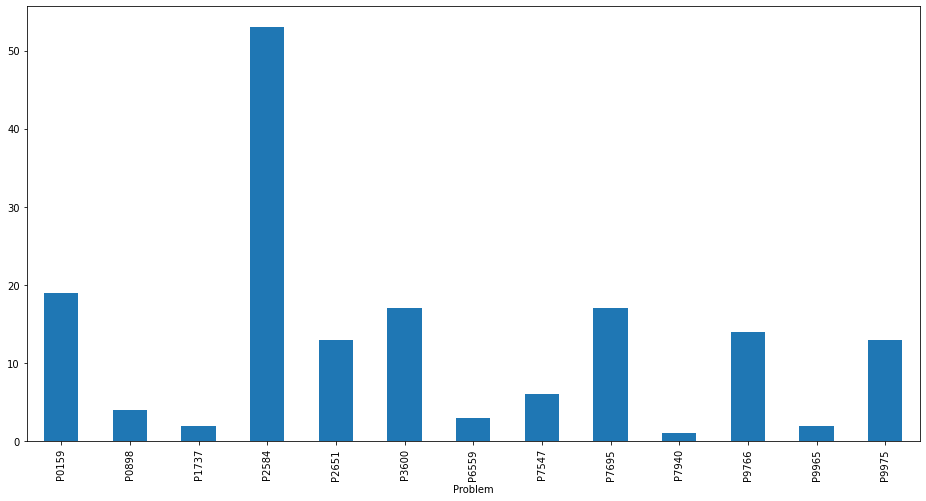

In [48]:
# Lets take a look at the distribution of problems
case_to_problem_df.groupby(['Problem']).size().plot.bar(x='Problem',figsize=(16,8))

## Event Distribution
Lets find the top 20 Event types. Again, there's a real 'skew' in the distribution of Event types with E35590 occuring considerably more frequently than the other types.

In [63]:
event_count_df=case_to_events_and_parameters_df.groupby(['Event']).size()
event_count_df.sort_values(inplace=True,ascending=False)
event_count_df.head(20)

Event
E35590    531718
E62937     36313
E82587     30696
E18654     29931
E43392     28074
E92541     26933
E78109     26748
E86047     25421
E76035     23434
E74141     22182
E42153     21934
E19863     19469
E51973     19170
E48445     17689
E14740     17560
E01135     12420
E27635     10028
E28452      9781
E77306      9549
E21806      9498
dtype: int64

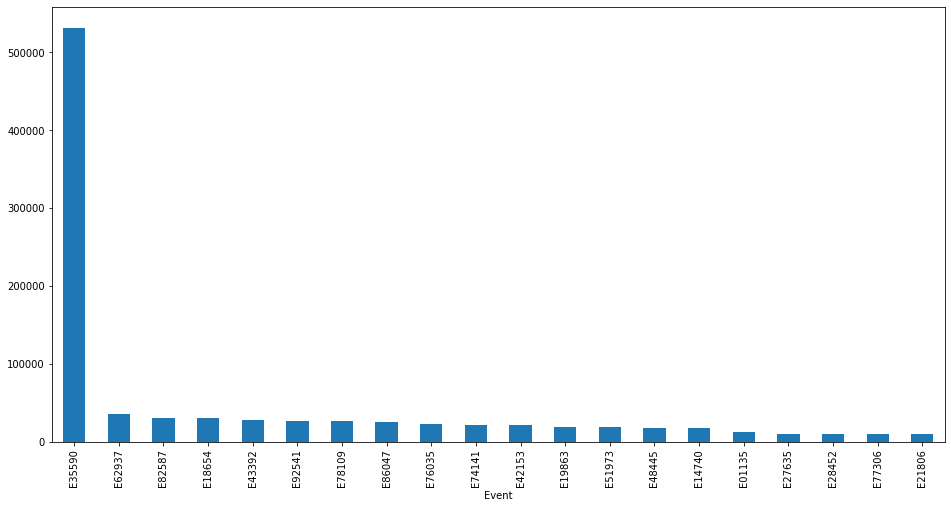

In [64]:
event_count_df.head(20).plot.bar(x='Event',figsize=(16,8))

## More Exploratory Data Analysis
More data exploration and analysis goes here.

# Data Engineering
Data 'wrangling', shaping and engineering does here. Generally to enable a 'right sized' dataset to supply a machine learning pipeline.

# Modelling
Data Science magic and general 'wizardy' happens here.

# Model Evaluation & Scoring
Test, validate and score models against the test dataset here (hopefully the scores are as close to 100% as possible).

# Results, Discussion and Conclusion
What have we learnt.